## Panel data, also known as longitudinal data or cross-sectional time series data, refers to data that is collected on multiple subjects (such as individuals, firms, countries, etc.) over time.
This type of data contains both cross-sectional (across entities) and time-series (over time) dimensions, providing a rich dataset that can capture more complex relationships and variability.
### **Panel Data Models:**

Panel data, also known as longitudinal data, combines **cross-sectional** data (multiple entities) and **time-series** data (multiple time periods). It allows for analyzing how variables evolve over time and across different entities.

### **Types of Panel Data Models:**

1. **Pooled OLS (Ordinary Least Squares):**
   - Assumes the relationship between variables is the same for all entities and time periods, ignoring individual-specific effects.

   **Equation:**
   \[Y_{it} = \beta_0 + \beta_1 X_{it} + \epsilon_{it}\]

2. **Fixed Effects Model (FE):**
   - Controls for entity-specific characteristics that do not change over time, allowing for varying relationships across entities.

   **Equation:**
   \[Y_{it} = \beta_0 + \beta_1 X_{it} + \alpha_i + \epsilon_{it}\]
   where \(\alpha_i\) is the entity-specific effect.

3. **Random Effects Model (RE):**
   - Assumes the entity-specific effects are random and uncorrelated with the explanatory variables.

   **Equation:**
   \[Y_{it} = \beta_0 + \beta_1 X_{it} + \alpha_i + \epsilon_{it}\]

### **Choosing Between Fixed and Random Effects:**
- **Fixed Effects**: Use when unobserved entity-specific characteristics are correlated with the independent variables.
- **Random Effects**: Use when unobserved entity-specific effects are uncorrelated with the independent variables.

The **Hausman Test** helps determine which model to use based on the data's structure.

### **Advantages of Panel Data:**
- **Increased Data**: Combines cross-sectional and time-series data, improving the reliability of estimates.
- **Control for Unobserved Heterogeneity**: Handles individual-specific variations, leading to more accurate models.
- **Dynamic Relationships**: Studies how relationships evolve over time.

Panel data models provide powerful tools for understanding complex relationships across entities and over time.


Total number of input records for analysis: 5000

First 10 records of the dataset:
   ID  Time    Outcome     Rainfall  Fertilizer
0   1     1  54.967142   715.248064  232.150527
1   1     2  48.617357   709.317178  269.450054
2   1     3  56.476885   440.871365  240.261894
3   1     4  65.230299   733.981962  311.041805
4   1     5  47.658466   946.565816  419.717853
5   1     6  47.658630   545.153576  222.895784
6   1     7  65.792128  1009.696530  400.082050
7   1     8  57.674347   897.554964  221.832793
8   1     9  45.305256   653.153336  215.237279
9   1    10  55.425600   771.694073  381.859462


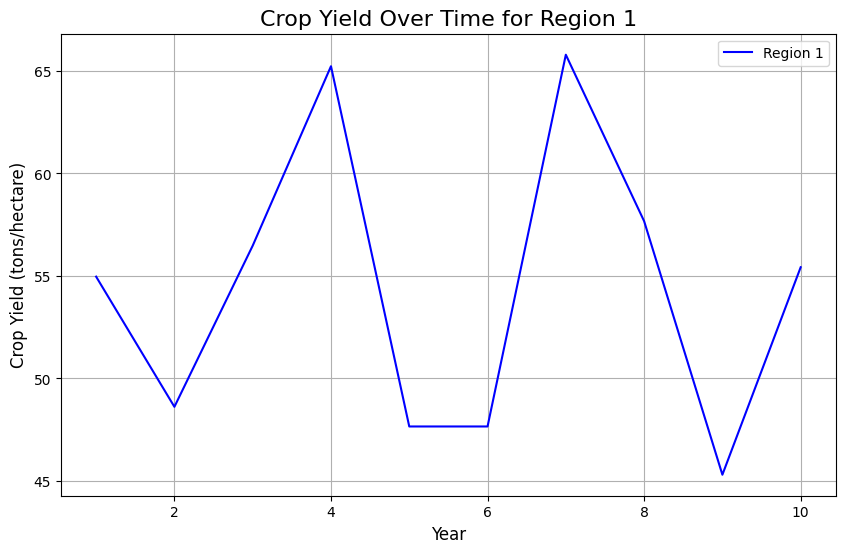

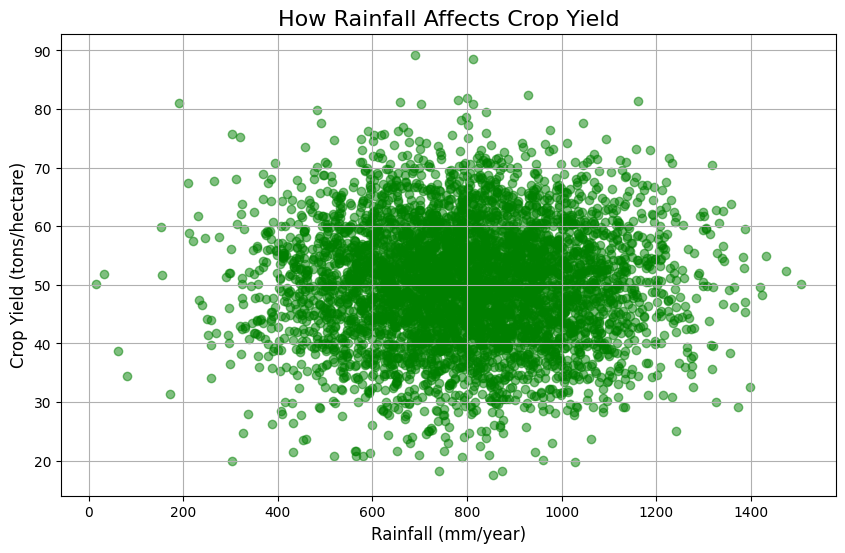

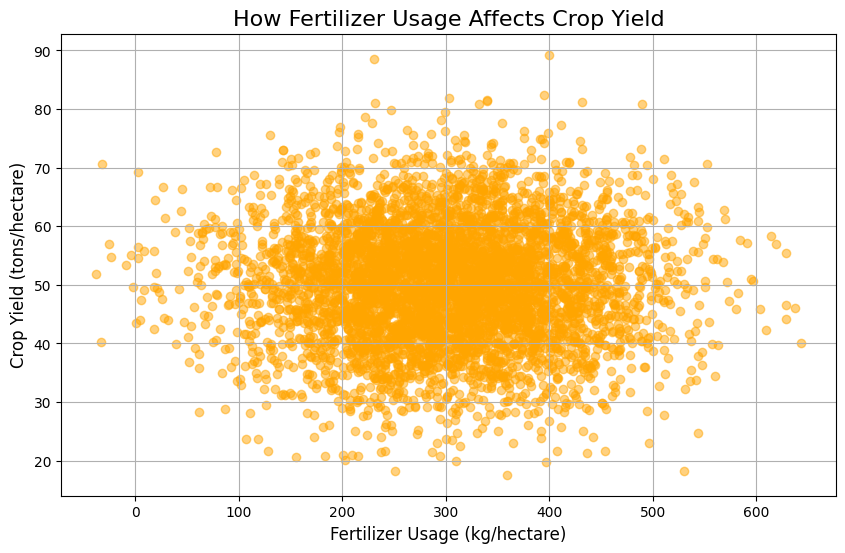

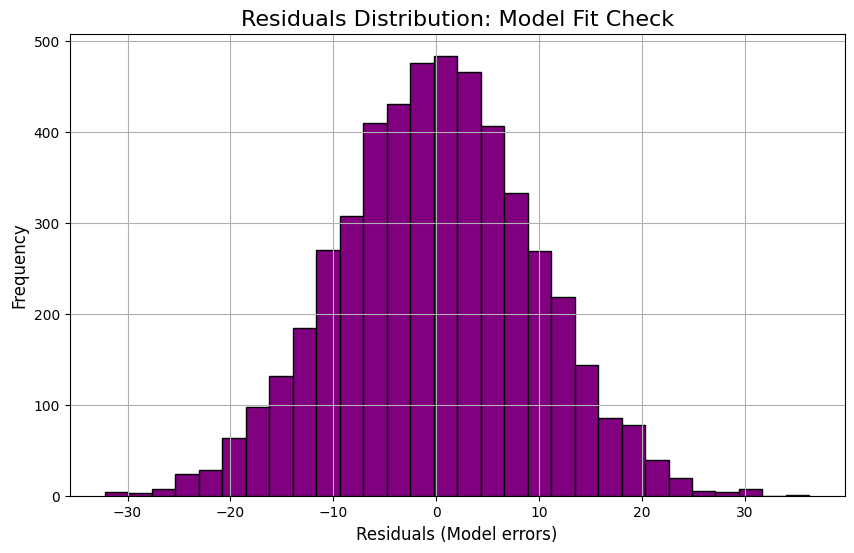

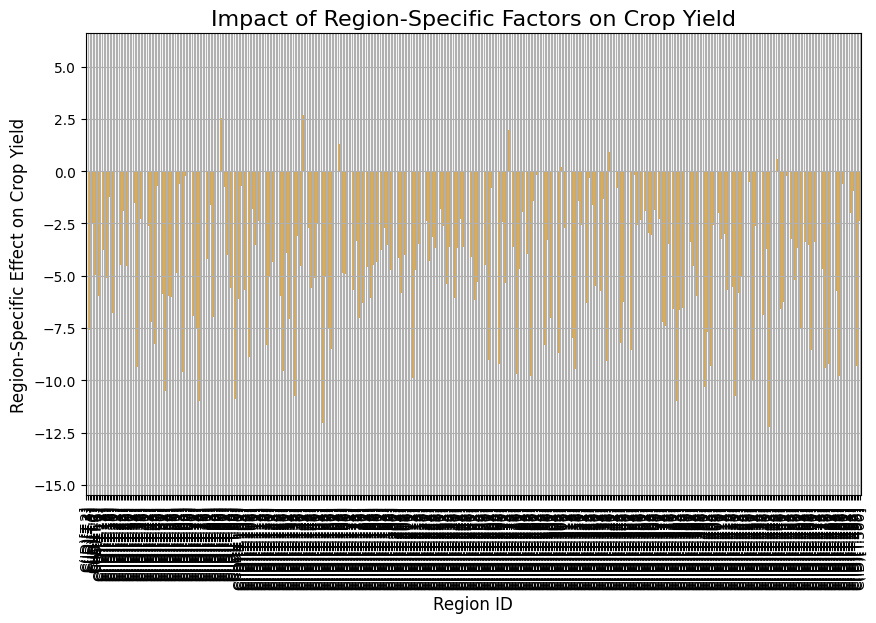

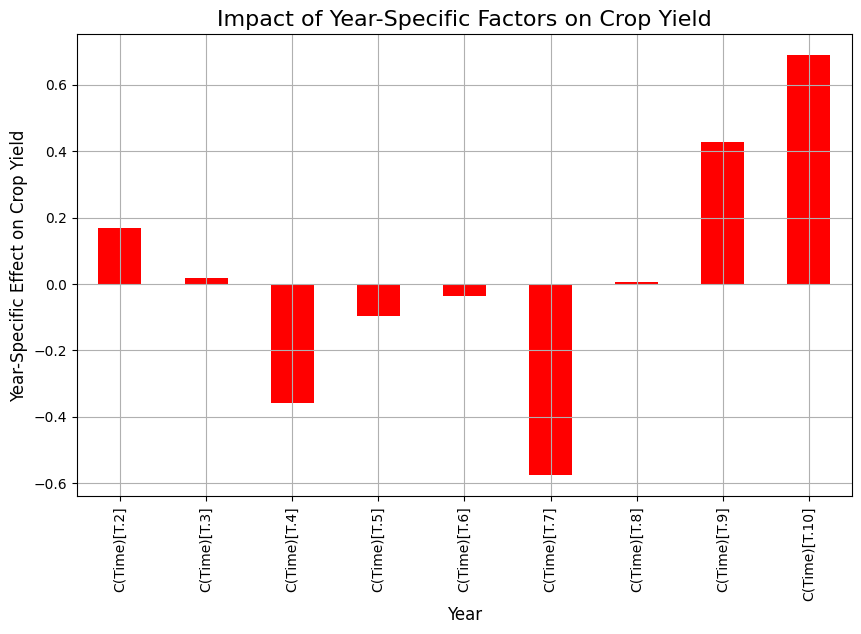


### Model Interpretation Summary:

1. Fixed Effects Model: 
   - Analyzes the impact of Rainfall, Fertilizer, and regional/yearly variations on crop yield, capturing region and time-specific characteristics.

2. Residuals: 
   - Analyzes the model's fit. A good model will have evenly distributed residuals, while irregular patterns indicate potential improvements.

3. Region-Specific Effects: 
   - Visualizes the effect of different regions on crop yield, with variation in performance based on region-specific factors like rainfall and fertilizer.

4. Year-Specific Effects: 
   - Shows how external factors (e.g., climate, market conditions) influence yield variations across years.

5. Rainfall & Fertilizer Correlation: 
   - Investigates how rainfall and fertilizer usage impact crop yield, exploring their relationship and interdependencies.

6. Rainfall & Fertilizer Distribution: 
   - Examines how rainfall and fertilizer are distributed across regions, revealing regions needing special

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Simulate a dynamic panel data set (customizable)
n = 500  # number of regions/farms
T = 10  # number of years of data 

# Generate random data for the panel data model
data = {
    'ID': np.repeat(np.arange(1, n + 1), T),  # Region/Farm IDs (500 farms, 10 years)
    'Time': np.tile(np.arange(1, T + 1), n),  # Year 1 to 10
    'Outcome': np.random.normal(50, 10, n * T),  # Crop yield (in tons/hectare)
    'Rainfall': np.random.normal(800, 200, n * T),  # Rainfall (mm/year)
    'Fertilizer': np.random.normal(300, 100, n * T)  # Fertilizer usage (kg/hectare)
}

df = pd.DataFrame(data)

# Print dataset information
print(f"Total number of input records for analysis: {df.shape[0]}")
print("\nFirst 10 records of the dataset:")
print(df.head(10))

# Model fitting: Fixed Effects Model - Outcome as function of Rainfall, Fertilizer, with fixed effects for ID and Time
model_fe = smf.ols('Outcome ~ Rainfall + Fertilizer + C(ID) + C(Time)', data=df).fit()

# Residuals to check model fit
residuals = model_fe.resid

# Dynamic plotting functions
def plot_timeseries(entity_id, df):
    entity_data = df[df['ID'] == entity_id]
    plt.figure(figsize=(10, 6))
    plt.plot(entity_data['Time'], entity_data['Outcome'], label=f'Region {entity_id}', color='blue')
    plt.title(f'Crop Yield Over Time for Region {entity_id}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Crop Yield (tons/hectare)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_scatter(x, y, xlabel, ylabel, title, color='green'):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5, color=color)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True)
    plt.show()

def plot_histogram(data, title, xlabel, ylabel, color='purple'):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, color=color, edgecolor='black')
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True)
    plt.show()

def plot_bar(data, title, xlabel, ylabel, color='orange'):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar', color=color)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True)
    plt.show()

# Visualizations (Dynamic)
plot_timeseries(entity_id=1, df=df)
plot_scatter(df['Rainfall'], df['Outcome'], 'Rainfall (mm/year)', 'Crop Yield (tons/hectare)', 'How Rainfall Affects Crop Yield', color='green')
plot_scatter(df['Fertilizer'], df['Outcome'], 'Fertilizer Usage (kg/hectare)', 'Crop Yield (tons/hectare)', 'How Fertilizer Usage Affects Crop Yield', color='orange')
plot_histogram(residuals, 'Residuals Distribution: Model Fit Check', 'Residuals (Model errors)', 'Frequency', color='purple')

# Display Fixed Effects (Region-specific)
fixed_effects = model_fe.params.filter(regex='C\(ID\)')
plot_bar(fixed_effects, 'Impact of Region-Specific Factors on Crop Yield', 'Region ID', 'Region-Specific Effect on Crop Yield', color='orange')

# Display Time Effects (Year-specific)
time_effects = model_fe.params.filter(regex='C\(Time\)')
plot_bar(time_effects, 'Impact of Year-Specific Factors on Crop Yield', 'Year', 'Year-Specific Effect on Crop Yield', color='red')

# Model Interpretation Summary
interpretation = """
### Model Interpretation Summary:

1. Fixed Effects Model: 
   - Analyzes the impact of Rainfall, Fertilizer, and regional/yearly variations on crop yield, capturing region and time-specific characteristics.

2. Residuals: 
   - Analyzes the model's fit. A good model will have evenly distributed residuals, while irregular patterns indicate potential improvements.

3. Region-Specific Effects: 
   - Visualizes the effect of different regions on crop yield, with variation in performance based on region-specific factors like rainfall and fertilizer.

4. Year-Specific Effects: 
   - Shows how external factors (e.g., climate, market conditions) influence yield variations across years.

5. Rainfall & Fertilizer Correlation: 
   - Investigates how rainfall and fertilizer usage impact crop yield, exploring their relationship and interdependencies.

6. Rainfall & Fertilizer Distribution: 
   - Examines how rainfall and fertilizer are distributed across regions, revealing regions needing special focus due to extreme values.

7. Crop Yield Over Time: 
   - Helps identify long-term trends in crop yield, guiding strategic farming decisions.

### Key Takeaways:
- Rainfall and Fertilizer are key drivers but their impact varies by region and time.
- The model is well-fitted, though further improvements can be made based on residuals.
- Understanding **region** and **year-specific effects** is crucial for optimizing crop yield.
"""

print(interpretation)
